**SCRIPTS AVAILABLE ON:** https://github.com/hampusosterbom/An-analysis-of-upgrade-feasibilities-for-ALMA-scripts.git

**NOTE:** Scripts are not perfect, if you run into any issues or have any questions feel free to send an email to `hampusosterbom1@gmail.com`

**Configuration files can be found here:** https://almascience.nrao.edu/tools/casa-simulator

---
# **kml_to_cfg.py**


**Script to read markers from a .kml file and add them to a configuration with correct elevation**

- The scripts uses "open-elevations" API to get correct elevation values given coordinates (which are read from the markers from the .kml-file).
- It first gets ALMAs reference point elevation ($\text{\emph{lat}}_{0} = -23.02271113	^\circ, \ \text{\emph{lon}}_{0} = -67.75436287^\circ$, OSO monument, i.e. MASTER0) in order to convert the ABSOLUTE elevation, retrieved from the API, to the relative elevation compared to the reference point (as in standard ALMA-configurations). PS: we use the Chalmers master ant. (MASTER0) as the reference point, by using these coordinates I found the scripts and positions line up correctly / most accurately when going between cfg-files and kml-files, see https://legacy.nrao.edu/alma/site/Chajnantor/maps/coordinates.html
- It then adds these new XYZ coordinates as antennas to the base-cfg provided and writes out a combined configuration. 

**Example: we want to add 5 antennas to C43-10:**
-  Start by placing markers in Google earth where you would like to add antennas
- Make sure you place all the markers (antennas) in a folder
- Save the file as a .kml

**Packages needed:**

`pandas`, `geopandas`, `numpy`, `requests`, `pyproj`, `fiona`


<img src="guide1.png" width="70%">

  

**Import generate_cfg_from_kml and setup:**

In [37]:

# Be sure to save kml_to_cfg.py in a directory/folder then you can either make a script in that folder and do 
# the following or run it with "python kml_to_cfg.py --base_cfg --kml_path --folder_name --out_cfg"
from kml_to_cfg import generate_cfg_from_kml

generate_cfg_from_kml(
    base_cfg_path="alma.cycle11.10.cfg",        # Path to the cfg you want to add pads to
    kml_path="5pads.kml",                       # Path to the kml file with the markers
    folder_name="antennas",                     # Name of the folder with the markers
    output_path="C43-10p5.cfg"                  # Output path of combined cfg
)


2025-08-10 20:28:12,956 - INFO - No existing NP pads; starting at NP001
2025-08-10 20:28:13,406 - INFO - Reference center elevation: 5032.0 m
2025-08-10 20:28:13,580 - INFO - Adding 5 new NP pads with relative z values
2025-08-10 20:28:13,585 - INFO - Wrote config to C:\Users\hampu\Guide\C43-10p5.cfg


**Now the 5 antennas we wanted to add is part of the configuration, denoted as NP# (New Pad):**

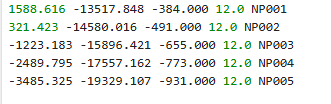

---
# **cfg_to_kml.py**
**Script to convert antenna positions from a cfg-file into markers in a kml-file:**

- Like 'kml_to_cfg.py' but reversed, here we can take any cfg-file and convert it to a .kml file with the antennas as markers.
  
**Packages needed:**

`pandas`, `pyproj`, `simplekml`

In [39]:
from cfg_to_kml import generate_kml_from_cfg

generate_kml_from_cfg("alma.cycle11.10.cfg", "example.kml")
print("Example KML file generated: example.kml")

2025-08-10 20:28:21,032 - INFO - Saved KML to example.kml


Example KML file generated: example.kml


Now we succesfully have a kml-file with markers at all antenna positions for alma.cycle11.10:

<img src="alma.cycle11.10.guide.png" width="70%">



---
# **pad_placer_alma.py**

**Script that tries to optimize pad placement in given allowed regions (focuses on BLD smoothness):**

**Packages needed:**
`pandas`, `numpy`, `shapely`, `scipy`, `pyproj`, `matplotlib`, `geopandas`, `scikit-learn`, `requests`


**Key parameters:**

- `cfg_path` – existing ALMA `.cfg` (LOC: x y z diam name)  
- `kml_path` – KML with allowed regions  
- `poly_layers` – layer names inside `kml_path` to use  
- `regions_kml` – KML of “region pads” (optional reuse set)  
- `favored_weight` – weight for reuse candidates vs grid (e.g., 0.75)  
- `include_reuse` – allow selecting pads from `regions_kml`  

- `n_new` – how many pads to add  
- `spacing` – grid spacing for candidate generation  
- `min_bl` – minimum baseline to any **existing** pad (m)  
- `R_max` – max radius for candidates from array center (m)  
- `inner_radius`, `inner_ratio`, `outer_ratio` – define inner/outer split and the desired mix  
- `ratio_penalty_weight` – strength of penalty for deviating from that mix (0 = ignore)  
- `transition_width` – softens the inner/outer transition around `inner_radius`  

- `cable_weight` – cost term that discourages long cable runs (to reference point)  
- `density_radius`, `density_weight` – penalize crowding to spread pads out  
- `sigma_b`, `fixed_r_max` – shape & extent of the **target baseline distribution** (histogram binning + goal)  

- `use_open_elevation` – fetch z from Open-Elevation  
- `absolute_z` – if true, write absolute elevation; if false, write **LOC-relative** `z = pad − origin`  

**Outputs:**

- `out_new` – CFG of **new pads only**  
- `out_plus57` – **existing + new** combined CFG  
- Figures saved:  
  - `pads_scatter.png`  
  - `baseline_hist.png`







2025-08-10 20:10:13,780 - INFO - Loaded 170 region pads
2025-08-10 20:10:18,397 - INFO - Clipped 0 candidates beyond 30000 m
2025-08-10 20:10:18,402 - INFO - Total candidates: 1180 | Region: 0 | Inner: 0
2025-08-10 20:10:18,453 - INFO - Step 1/30: added 16, cost=4797.3
2025-08-10 20:10:18,478 - INFO - Step 2/30: added 93, cost=5020.7
2025-08-10 20:10:18,503 - INFO - Step 3/30: added 5, cost=5313.3
2025-08-10 20:10:18,526 - INFO - Step 4/30: added 128, cost=5681.2
2025-08-10 20:10:18,550 - INFO - Step 5/30: added 105, cost=6215.9
2025-08-10 20:10:18,573 - INFO - Step 6/30: added 235, cost=6916.0
2025-08-10 20:10:18,594 - INFO - Step 7/30: added 8, cost=7598.1
2025-08-10 20:10:18,617 - INFO - Step 8/30: added 1179, cost=8487.7
2025-08-10 20:10:18,640 - INFO - Step 9/30: added 21, cost=9071.3
2025-08-10 20:10:18,662 - INFO - Step 10/30: added 567, cost=10134.4
2025-08-10 20:10:18,686 - INFO - Step 11/30: added 18, cost=11027.0
2025-08-10 20:10:18,708 - INFO - Step 12/30: added 1088, cost=

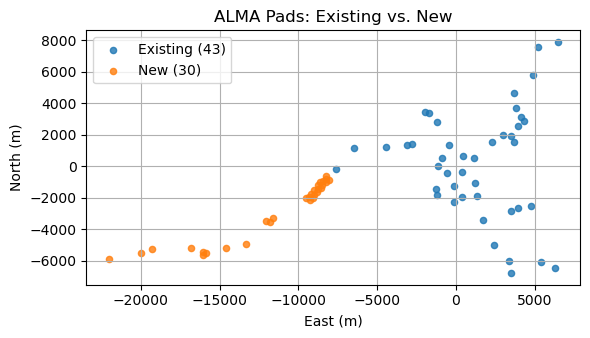

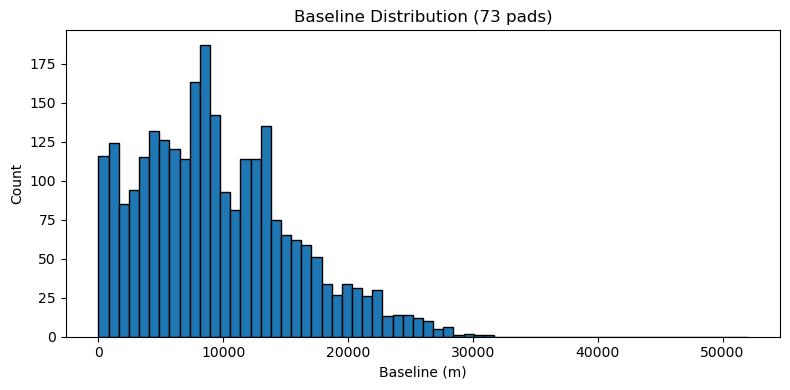

In [32]:
import argparse
from pad_placer_alma import load_data, optimize_pads, add_open_elevation_z, write_outputs, generate_plots

example_args = argparse.Namespace(
    cfg_path="alma.cycle11.10.cfg",
    kml_path="RegionsOSF.kml",
    poly_layers=['Regions OSF'],
    regions_kml="PadsAOS.kml",
    out_new="new_pads_57.cfg",
    out_plus57="alma.cycle11.10.plus_new.cfg",
    n_new=30, spacing=25.0, min_bl=200, R_max=30000, inner_radius=4700,
    favored_weight=0.75, include_reuse=False,
    cable_weight=5e-6, inner_ratio=2, outer_ratio=1,
    fixed_r_max=52000.0, ratio_penalty_weight=0,
    transition_width=6000.0, density_radius=1900.0, density_weight=0.4,
    sigma_b=24000, use_open_elevation=True, absolute_z=False
)

# 2) Load & optimize
existing_df, existing_pts, ex_weights, ctr_start, allowed_area, region_df, crs_loc, lat0, lon0 = load_data(example_args)
new_df, _, cand_df, sel_df, cand_pts, sel, fixed_r_max = optimize_pads(
    example_args, existing_df, existing_pts, ex_weights, ctr_start, allowed_area, region_df
)

# 3) Elevations (z in LOC: pad_elev − origin_elev)
if example_args.use_open_elevation:
    new_df = add_open_elevation_z(new_df, crs_loc, lat0, lon0, relative_to_origin=not example_args.absolute_z)

# 4) Save + plots
write_outputs(example_args, new_df, existing_df)
generate_plots(new_df, existing_df, fixed_r_max)

And if we switch "include_reuse" to True, and give a slight favor to reuse existing pads:


2025-08-10 20:09:47,377 - INFO - Loaded 170 region pads
2025-08-10 20:09:52,722 - INFO - Clipped 0 candidates beyond 30000 m
2025-08-10 20:09:52,728 - INFO - Total candidates: 1350 | Region: 170 | Inner: 152
2025-08-10 20:09:52,949 - INFO - Step 1/30: added 1320, cost=5740962.1
2025-08-10 20:09:53,028 - INFO - Step 2/30: added 94, cost=5806923.4
2025-08-10 20:09:53,088 - INFO - Step 3/30: added 16, cost=5820026.2
2025-08-10 20:09:53,136 - INFO - Step 4/30: added 5, cost=5838776.8
2025-08-10 20:09:53,178 - INFO - Step 5/30: added 199, cost=5859403.5
2025-08-10 20:09:53,219 - INFO - Step 6/30: added 787, cost=5884438.5
2025-08-10 20:09:53,252 - INFO - Step 7/30: added 17, cost=5910161.3
2025-08-10 20:09:53,287 - INFO - Step 8/30: added 1243, cost=5938025.0
2025-08-10 20:09:53,319 - INFO - Step 9/30: added 1234, cost=6032017.4
2025-08-10 20:09:53,357 - INFO - Step 10/30: added 100, cost=6130079.2
2025-08-10 20:09:53,383 - INFO - Step 11/30: added 1230, cost=6172400.8
2025-08-10 20:09:53,4

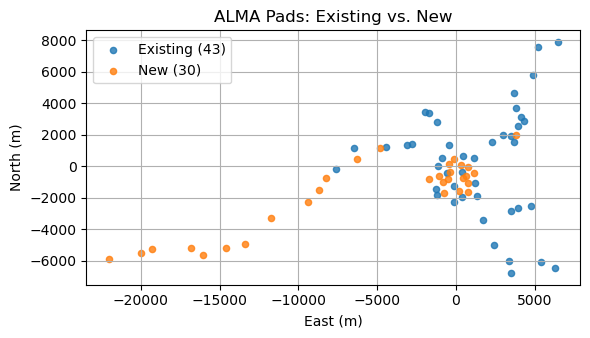

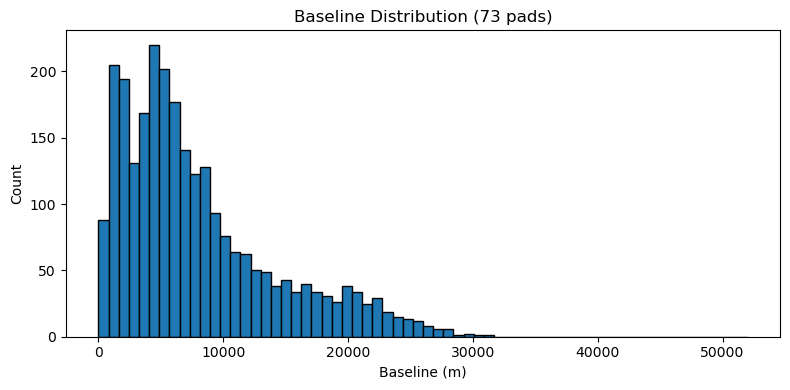

In [30]:
import argparse
from pad_placer_alma import load_data, optimize_pads, add_open_elevation_z, write_outputs, generate_plots

example_args = argparse.Namespace(
    cfg_path="alma.cycle11.10.cfg",
    kml_path="RegionsOSF.kml",
    poly_layers=['Regions OSF'],
    regions_kml="PadsAOS.kml",
    out_new="new_pads_57.cfg",
    out_plus57="alma.cycle11.10.plus_new.cfg",
    n_new=30, spacing=25.0, min_bl=200, R_max=30000, inner_radius=4700,
    favored_weight=0.99, include_reuse=True,
    cable_weight=5e-6, inner_ratio=2, outer_ratio=1,
    fixed_r_max=52000.0, ratio_penalty_weight=0,
    transition_width=6000.0, density_radius=1900.0, density_weight=0.4,
    sigma_b=24000, use_open_elevation=True, absolute_z=False
)

# 2) Load & optimize
existing_df, existing_pts, ex_weights, ctr_start, allowed_area, region_df, crs_loc, lat0, lon0 = load_data(example_args)
new_df, _, cand_df, sel_df, cand_pts, sel, fixed_r_max = optimize_pads(
    example_args, existing_df, existing_pts, ex_weights, ctr_start, allowed_area, region_df
)

# 3) Elevations (z in LOC: pad_elev − origin_elev)
if example_args.use_open_elevation:
    new_df = add_open_elevation_z(new_df, crs_loc, lat0, lon0, relative_to_origin=not example_args.absolute_z)

# 4) Save + plots
write_outputs(example_args, new_df, existing_df)
generate_plots(new_df, existing_df, fixed_r_max)

---
# **ALMA Simulation Pipeline — Quick Guide**

This guide explains how to set up and use two Python scripts for ALMA simulations using CASA (tested to work on  CASA v6.7.0.31 (might work on other versions as well)):
- **`generate_sky_model.py`**: Creates a FITS sky model with 8 Gaussian sources in a ring plus one central source. Configurable (e.g., declination, flux, FWHM, r, Cell Size, Imsize).
- **`run_simalma_pipeline.py`**: Automates sky model generation, `simalma` simulations, `tclean` imaging, and logs metrics (RMS, peak flux, beam size).

**Workflow**: Generate sky models → Simulate observations → Image and log results.

## Prerequisites
1. **CASA Installation**
2. **ALMA Config Files**:
   - you can either use "standard"-cfgs included in CASA
   - or use your own custom-cfgs, they need to be placed in "casa/data/alma/simmos/" to work (same directory as the standard-cfgs reside in).
   - I found that CASA do not like when you name them whatever you want, the cfgs must have "alma.cycleXX" in order to work! => you can name them "alma.cycleXX.YY" as well (and possibly other names as well, but the "alma.cycle"-part seems to be mandatory).
3. **Python Dependencies**:
- **For Scripts**: All required packages (`os`, `sys`, `argparse`, `logging`, `json`, `math`, `subprocess`, `numpy`, `pathlib`, `casatools`, `casatasks`) are included in CASA 6.7.0.31 (no packages should thus be required to download). **No external installation needed**.

## 1. Inputs

### Config files:
- **params.json** — master control for the pipeline run
- **sky_config.json** — Gaussian source model (ring of points)
- **sky_config_ring.json** — Concentric ring model (uniform disks)

### Scripts:
- **generate_sky_model.py** — builds Gaussian-ring sky model FITS for CASA
- **generate_ring_sky_model.py** — builds concentric-ring sky model FITS for CASA
- **run_simalma_pipeline.py** — main driver: generates sky, runs `simalma` + `tclean`, exports FITS

## 2. How it works

1. **Sky model generation**  
   - Select script via `sky_script` in `params.json`  
   - Reads base config (`sky_config*.json`)  
   - Optionally overrides geometry/flux based on beam size (for `ring` script)  
   - Outputs `.fits` sky model

2. **Simulation**  
   - Finds ALMA config file (`config_map` in params)  
   - Computes beam size from baselines (L80)
   - Picks cell size = beam / `sampling_factor`  
   - Runs CASA `simalma` to generate noisy visibilities

3. **Imaging & Cleaning**  
   - Runs `tclean` twice: dirty + cleaned image  
   - Auto-sets multiscale sizes from beam in pixels  
   - Threshold = `threshold_factor` × RMS (dirty)  
   - Saves `.image` and `.fits` products

4. **Logging**  
   - Stores RMS, peak flux, beam size, and parameters in `pipeline_log.json`
  

## 3. Key parameters (from params.json)

- `project_base` — root folder for results  
- `config_map` — ALMA config file → short tag  
- `integration_times` — total integration times (`"4h"`, `"8h"`, etc.)  
- `declinations` — target declinations  
- `center_freq`, `width` — band center & bandwidth  
- `pwv` — precipitable water vapor (mm)  
- `phasecenter_ra` — RA center (Dec comes from loop)  
- `weightings` — `natural`, `uniform`, or `briggs`  
- `robust_values` — robust settings for `briggs`  
- `uvtaper_values` — uv-taper settings  
- `niter`, `deconvolver`, `threshold_factor` — clean settings  
- `fov_arcsec`, `sampling_factor` — image size control  
- `sky_script`, `sky_config` — which sky generator and config JSON to use  
- `casa_bin` — path to CASA executable  
- `extra_dirs` — extra search paths for ALMA config files  

## 4. Running the pipeline
**Note: since the pipeline needs CASA to run ive tried to show step by step on how to get it to run (for the nine Gaussians skymodel).**
- Save `generate_sky_model.py` and `run_simalma_pipeline.py` in your working directory (Also save `params.json` and `sky_config.json` after changing to desired values, also make excecutable; chmod +x ~/run_simalma_pipeline.py etc). 
- **The following is params.json, change as desired (PS you need to change `casa_bin` to YOUR path):**

<img src="guide3.png" width="60%">


- **The following is sky_config.json, change as desired:**
  
<img src="guide4.png" width="40%">

**Both of these are available on github. After changing as desired, and after placing the updated .json files (and scripts) in your working directory, you can now run the pipeline:**

-**To run pipeline do: `casa --nogui --nologger -c run_simalma_pipeline.py params.json`**

-**The following is a screenshot from the terminal:**

<img src="guide5.png" width="90%">

-**And then it will run for a while depending on how many various observation times, weightings, etc you chosed:**

<img src="guide6.png" width="90%">

-**When it is done running you will have all the data/results from the simulations in `alma2040_pipeline` (i.e. the project base you specified):**

<img src="guide7.png" width="90%">

-**In the following folders you will have all the .fits files, as well as all the data from simalma like .psf, .residual, .model, ....:**

<img src="guide8.png" width="60%">

-**You can now plot the resulting .fits files however you like. The following is from the run we just did:**

<img src="guide11.png" width="60%">






---
